# P6. Analysez les ventes d'une librairie 

# Introduction

## 1 Importation des librairies

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Graphigues
import seaborn as sns #Graphiques
import folium
import scipy as sp


## 1.1. Importation des fichiers

In [2]:
customers=pd.read_csv (r'C:\Users\Admin\Desktop\P6_Analysez_les_ventes_LEVERT_Benoit\DAN-P6-donnees\customers.csv')
products=pd.read_csv (r'C:\Users\Admin\Desktop\P6_Analysez_les_ventes_LEVERT_Benoit\DAN-P6-donnees\products.csv')
transactions=pd.read_csv (r'C:\Users\Admin\Desktop\P6_Analysez_les_ventes_LEVERT_Benoit\DAN-P6-donnees\transactions.csv')



## 2. Exploration des fichiers

## 2.1. Exploration du fichier 'customers'

In [3]:
# data exploration
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
# data exploration
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
# data exploration
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [6]:
# data exploration
customers['client_id'].duplicated().sum()

0

In [7]:
# data exploration
customers.duplicated().sum()

0

## 2.2. Exploration du fichier 'products'

In [8]:
# data exploration
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [9]:
# data exploration
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
# data exploration
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [11]:
products[products['id_prod'].duplicated()]

,id_prod,price,categ


In [12]:
products['id_prod'].duplicated().sum()

0

In [13]:
products.duplicated().sum()

0

## 2.3. Exploration du fichier 'transactions'

In [14]:
# data exploration
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [15]:
# data exploration
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [16]:
# data exploration
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [17]:
# data exploration
transactions[transactions['id_prod'].duplicated()]

,id_prod,date,session_id,client_id
34,1_251,2022-03-19 10:09:08.086643,s_181326,c_5961
59,1_281,2021-12-09 13:42:42.230086,s_131814,c_6035
64,0_1443,2022-01-01 05:08:31.105975,s_143213,c_5277
65,0_1411,2022-05-01 16:20:19.589944,s_202120,c_6367
113,1_451,2022-04-18 23:19:24.224849,s_196083,c_2132
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [18]:
# data exploration
transactions.duplicated().sum()

126

In [19]:
# data exploration
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [20]:
#data exploration
#Suppression des lignes tests
transactions = transactions[transactions["date"].str.contains("test_")==False]


In [21]:
#data exploration
#Vérification de la suppression des lignes tests
transactions.duplicated().sum()

0

In [22]:
#data exploration
#Vérification de la suppression des lignes tests
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id


# 2.4. Jointure et exploration

In [23]:
# Jointures
lapage = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod', indicator = True)
lapage

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0,both


In [24]:
lapage[lapage['_merge']!='both']


,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN,left_only


In [25]:
#Après ces vérifications on peut supprimer la colonne "_merge" de notre jointure
lapage=lapage.drop('_merge',axis=1)

In [26]:
#On change le format date en datetime
lapage['date'] = pd.to_datetime(lapage['date'])



lapage['annee']=lapage["date"].dt.year
lapage['mois']=lapage['date'].dt.month
lapage['jour']=lapage["date"].dt.day
lapage['annee_mois'] = lapage['annee'].astype(str) + "-" + lapage['mois'].astype(str)


In [27]:
lapage['annee_mois'] = pd.to_datetime(lapage['annee_mois'])

In [28]:
#valeurs manquante sur prix et categorie obervé dans la jointure
lapage.isnull().sum()


id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
price         221
categ         221
annee           0
mois            0
jour            0
annee_mois      0
dtype: int64

In [29]:
#rename
lapage.rename(columns = {'price':'C_A'}, inplace = True)


In [30]:
#verifications des valeurs manquantes price et categ
valeur_manquantes= lapage[(lapage['C_A'].isnull()) & (lapage['categ'].isnull())]
valeur_manquantes

,id_prod,date,session_id,client_id,sex,birth,C_A,categ,annee,mois,jour,annee_mois
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,NaN,NaN,2022,9,23,2022-09-01
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,NaN,NaN,2022,7,23,2022-07-01
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,NaN,NaN,2022,12,3,2022-12-01
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,NaN,NaN,2021,8,16,2021-08-01
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,NaN,NaN,2022,7,16,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,NaN,NaN,2021,8,25,2021-08-01
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,NaN,NaN,2022,3,6,2022-03-01
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,NaN,NaN,2022,5,16,2022-05-01
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,NaN,NaN,2022,2,11,2022-02-01


In [31]:
#On assigne la categorie correspondante '0', à la référence '0_2245'
lapage['categ'].fillna(0, inplace=True)

In [32]:
#On calcule le prix moyen de la catégorie 0
moy_categ_0 = lapage.loc[lapage['categ']==0]['C_A'].mean()
moy_categ_0

10.638188052306713

In [33]:
#On assigne le prix moyen de la catégorie 0, à la référence '0_2245' 
lapage['C_A'].fillna(moy_categ_0, inplace=True)


In [34]:
lapage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   C_A         679332 non-null  float64       
 7   categ       679332 non-null  float64       
 8   annee       679332 non-null  int64         
 9   mois        679332 non-null  int64         
 10  jour        679332 non-null  int64         
 11  annee_mois  679332 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 67.4+ MB


# Analyse des différents indicateurs de vente

 ## 3. Indicateurs et graphiques autour du chiffre d'affaires :

   ### 3.1. Evolution du C.A mensuel/annuel dans le temps 

In [35]:
#Calcul chiffre d'affaires total
chiffre_affaires = lapage.loc[(lapage["client_id"] != "NaN"),"C_A"].sum()
chiffre_affaires

11856079.719559552

In [36]:
#Calcul chiffre d'affaires mensuel
ca_mensuel = lapage.groupby(["annee_mois"])["C_A"].sum().reset_index()
ca_mensuel

,annee_mois,C_A
0,2021-03-01,482536.353692
1,2021-04-01,476258.234633
2,2021-05-01,493028.575504
3,2021-06-01,484163.027316
4,2021-07-01,482877.952752
5,2021-08-01,482380.533692
6,2021-09-01,507368.338257
7,2021-10-01,320873.207316
8,2021-11-01,516274.111881
9,2021-12-01,525991.747316


Text(0.5, 1.0, 'Evolution du C.A mensuel')

<Figure size 2880x576 with 0 Axes>

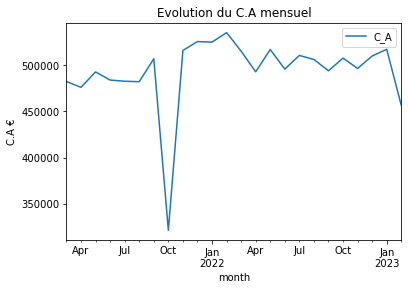

In [37]:
#Visualisation
plt.figure(figsize = (40,8))
ca_mensuel.plot(x='annee_mois', y='C_A')
plt.xlabel('month')
plt.ylabel('C.A €')

plt.title('Evolution du C.A mensuel')



In [38]:
#Nous remarquons une baisse du CA en octobre ; pourquoi ?
#Baisse du CA en octobre

octobre = lapage.loc[lapage.annee_mois== '2021-10', ['jour', 'C_A','categ']]
octobre

,jour,C_A,categ
68,2,4.99,0.0
71,3,15.99,0.0
80,13,17.01,0.0
86,24,4.63,0.0
93,5,5.99,0.0
...,...,...,...
679222,22,8.57,0.0
679240,26,7.99,0.0
679290,15,18.99,0.0
679315,1,16.99,0.0


In [39]:
#CA d'octobre
ca_octobre = pd.pivot_table(octobre, index = ['jour'], columns = 'categ', values = 'C_A',aggfunc=np.sum)
ca_octobre

categ,0.0,1.0,2.0
jour,,,
1,6950.500000,7003.79,3104.05
2,7141.010000,NaN,2041.12
3,6786.570000,NaN,2206.48
4,6554.876376,NaN,2746.08
5,6357.910000,NaN,3032.55
6,7546.580000,NaN,1944.11
7,6404.010000,NaN,1787.07
8,7069.530000,NaN,3137.82
9,6808.690000,NaN,2616.67


Text(0.5, 1.0, 'Evolution du C.A en octobre')

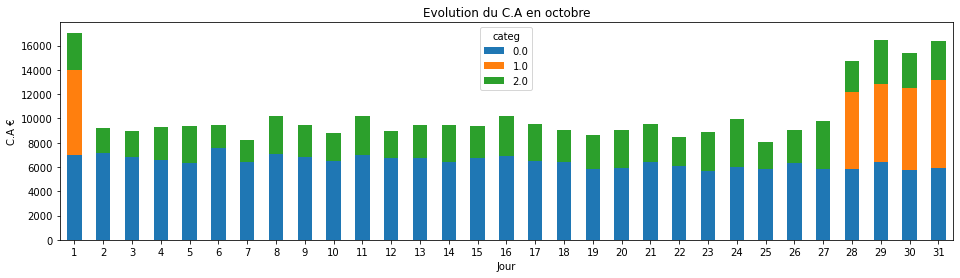

In [40]:
#Visualisation du CA d'octobre
ca_octobre.plot.bar(figsize=(16,4), stacked=True)
plt.xlabel('Jour')
plt.xticks(rotation=0)
plt.ylabel('C.A €')

plt.title('Evolution du C.A en octobre')

In [41]:
#Calcul chiffre d'affaires annuel
ca_annuel = lapage.groupby(["annee"])["C_A"].sum().reset_index()
ca_annuel

,annee,C_A
0,2021,4.771752e+06
1,2022,6.109958e+06
2,2023,9.743692e+05


Text(0.5, 1.0, 'Evolution du C.A annuel')

<Figure size 1080x504 with 0 Axes>

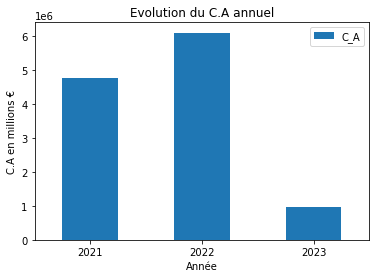

In [42]:
#Visualisation
plt.figure(figsize = (15,7))
ca_annuel.plot.bar(x='annee', y='C_A')
plt.xlabel('Année')
plt.xticks(rotation=0)
plt.ylabel('C.A en millions €')

plt.title('Evolution du C.A annuel')


### 3.2. Moyenne mobile du chiffre d'affaire

In [43]:
#Calcul de la moyenne mobile du chiffre d'affaire avec la fonction rolling()
moyenne_mobile = ca_mensuel.rolling(3).mean()
moyenne_mobile['annee_mois'] = ca_mensuel['annee_mois']
moyenne_mobile



C:\Users\Admin\AppData\Local\Temp\ipykernel_19896\1358929340.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['annee_mois'], dtype='object')
  moyenne_mobile = ca_mensuel.rolling(3).mean()


,C_A,annee_mois
0,NaN,2021-03-01
1,NaN,2021-04-01
2,483941.054610,2021-05-01
3,484483.279151,2021-06-01
4,486689.851858,2021-07-01
5,483140.504587,2021-08-01
6,490875.608234,2021-09-01
7,436874.026422,2021-10-01
8,448171.885818,2021-11-01
9,454379.688838,2021-12-01


<AxesSubplot:xlabel='annee_mois', ylabel='C_A'>

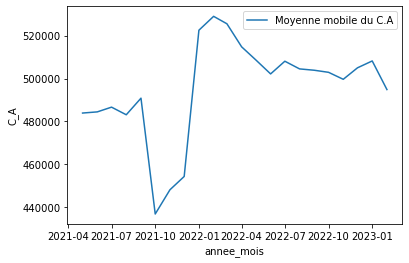

In [44]:
#Visualisation moyenne mobile:

sns.lineplot( x = 'annee_mois',
             y = 'C_A',
             data = moyenne_mobile,
             label = 'Moyenne mobile du C.A')

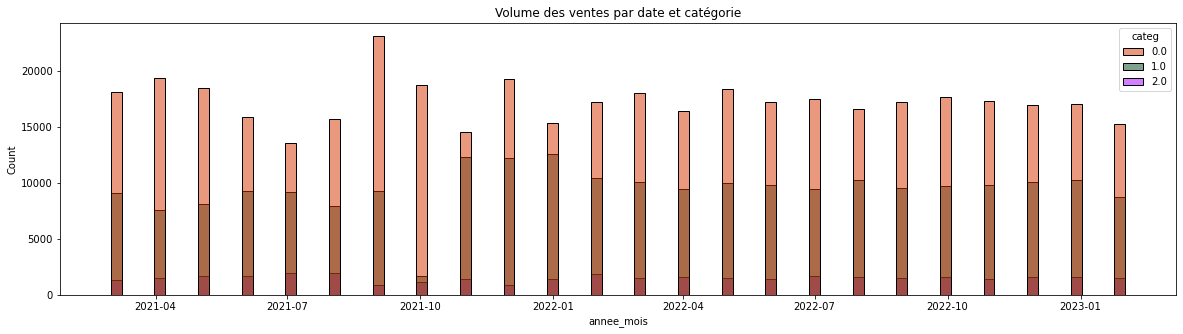

In [45]:
#Visualisation autour du C.A
#Volume des ventes par date et catégorie

plt.figure(figsize=(20,5
                   ))
sns.histplot(data=lapage, x='annee_mois', hue='categ', palette=["#d73501", "#004623", "#aa00ff"])
plt.title('Volume des ventes par date et catégorie')
plt.show()

### 3.3. les tops et les flops

In [46]:
#Quels sont Les 10 livres qui génèrent le plus de chiffres d'affaires ?

top10_sales = lapage.pivot_table(index=['id_prod', 'categ'], aggfunc={'C_A': np.sum}).sort_values(by='C_A', ascending=False).reset_index().head(10)
top10_sales

,id_prod,categ,C_A
0,2_159,2.0,94893.50
1,2_135,2.0,69334.95
2,2_112,2.0,65407.76
3,2_102,2.0,60736.78
4,2_209,2.0,56971.86
5,1_395,1.0,54356.25
6,1_369,1.0,54025.48
7,2_110,2.0,53846.25
8,2_39,2.0,53060.85
9,2_166,2.0,52449.12


Text(0.5, 1.0, 'top10_sales')

<Figure size 1080x504 with 0 Axes>

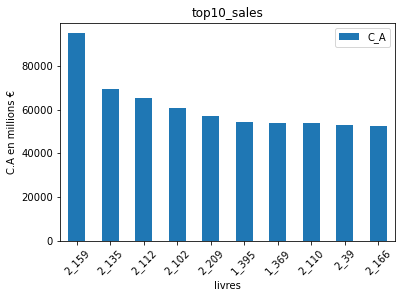

In [47]:
#Visualisation
plt.figure(figsize = (15,7))
top10_sales.plot.bar(x='id_prod', y='C_A')
plt.xlabel('livres')
plt.xticks(rotation=45)
plt.ylabel('C.A en millions €')

plt.title('top10_sales')

In [48]:
#Quels sont Les 10 livres qui génèrent le moins de chiffres d'affaires ?

top10_low_ranking_sales = lapage.pivot_table(index=['id_prod', 'categ'], aggfunc={'C_A': np.sum}).sort_values(by='C_A', ascending=False).reset_index().tail(10)
top10_low_ranking_sales

,id_prod,categ,C_A
3256,0_1840,0.0,2.56
3257,0_898,0.0,2.54
3258,0_1498,0.0,2.48
3259,0_1728,0.0,2.27
3260,0_541,0.0,1.99
3261,0_1601,0.0,1.99
3262,0_807,0.0,1.99
3263,0_1653,0.0,1.98
3264,0_1284,0.0,1.38
3265,0_1539,0.0,0.99


Text(0.5, 1.0, 'top10_low_ranking_sales')

<Figure size 1080x504 with 0 Axes>

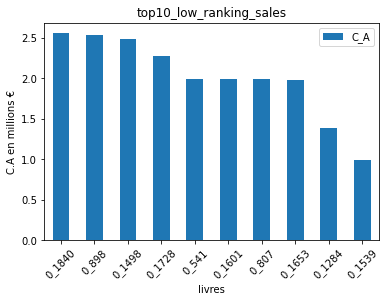

In [91]:
#Visualisation
plt.figure(figsize = (15,7))
top10_low_ranking_sales.plot.bar(x='id_prod', y='C_A')
plt.xlabel('livres')
plt.xticks(rotation=45)
plt.ylabel('C.A en millions €')

plt.title('top10_low_ranking_sales')

### 3.4. Répartition par catégorie


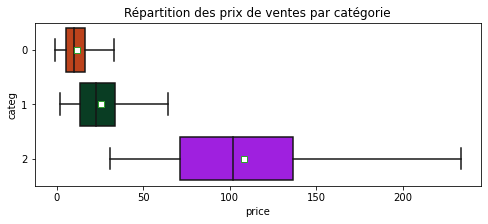

In [50]:
#Répartition des prix de ventes par catégorie


plt.figure(figsize=(8,3))
sns.boxplot(data=products, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["#d73501", "#004623", "#aa00ff"],meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Répartition des prix de ventes par catégorie')
plt.show()

Text(0.5, 1.0, 'Répartition  du volume des ventes par catégorie')

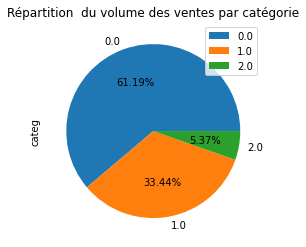

In [51]:
#Répartition du volume des ventes par catégorie

lapage['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%.2f%%')
plt.title('Répartition  du volume des ventes par catégorie')

On remarque que les livres les moins chers sont ceux qui se vendent le plus. Les livres de la catégorie 0 représentent à elles seules 61 % des ventes, suivit de la catégorie 1 avec un pourcentage de 33% et de la catégorie 2 à 5,3 %. 

Text(0.5, 1.0, 'Chiffre d affaires par catégorie')

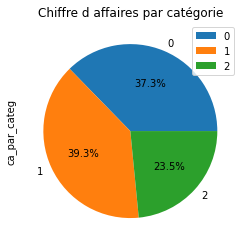

In [52]:
# Chiffre d'affaires par catégorie

ca_categ = lapage.groupby(['categ'])['C_A'].sum().rename_axis('categ').reset_index(name='ca_par_categ').sort_values(by='categ')

ca_categ.plot(
    
    kind='pie', y='ca_par_categ',
    legend=True,
    autopct='%1.1f%%')
plt.title('Chiffre d affaires par catégorie')

### 3.5.  Informations sur les profils clients


In [53]:
#Âge des clients
lapage['age_client'] = lapage['annee'] - lapage['birth']
lapage['age_client']



0         36
1         34
2         54
3         21
4         43
          ..
679327    71
679328    45
679329    34
679330    35
679331    27
Name: age_client, Length: 679332, dtype: int64

In [54]:
#Âge des clients
age_client_count= lapage["age_client"].value_counts().rename_axis('age_client').reset_index(name='count').sort_values(by='age_client')
age_client_count

,age_client,count
37,17,5935
25,18,9636
41,19,5409
50,20,4432
51,21,4306
...,...,...
73,90,243
74,91,210
75,92,196
76,93,129


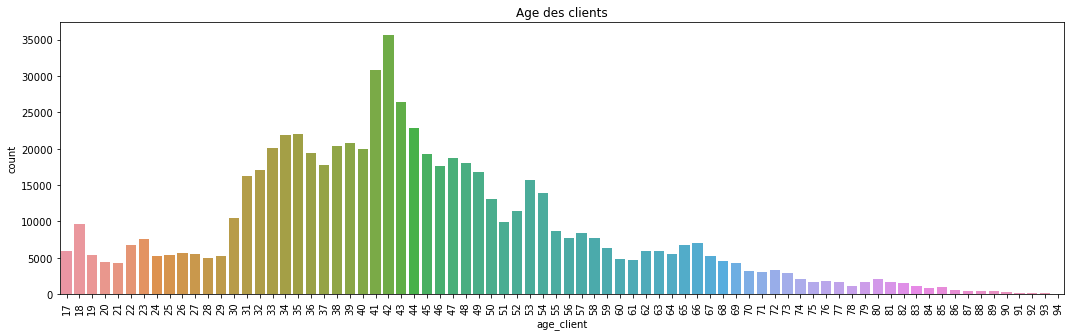

In [55]:
#Répartition des clients par âge

plt.figure(figsize=(18,5))
sns.barplot(
    data=age_client_count,
    y='count', x='age_client')
plt.xticks(rotation=90)
plt.title('Age des clients')
plt.show()

La majorité de la clientèle lapage a entre 30 et 50 ans.
On remarquent également un nombre beaucoup plus important de clients ayant 17 à 18 ans.

In [56]:
# les clients fidèles:
client_fidele = lapage.groupby(["client_id"])["C_A"].sum().nlargest(10)
client_fidele



client_id
c_1609    324033.350000
c_4958    289760.340000
c_6714    153662.749128
c_3454    113669.844564
c_3263      5276.870000
c_1570      5271.620000
c_2899      5214.050000
c_2140      5208.820000
c_7319      5155.770000
c_8026      5093.218188
Name: C_A, dtype: float64

Text(0.5, 1.0, 'les clients les plus fidèles')

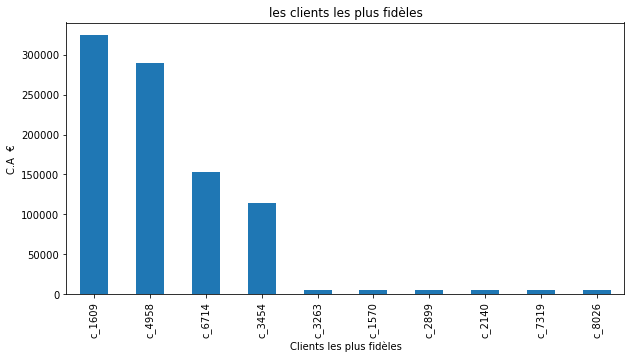

In [57]:
# les clients les plus fidèles:

plt.figure(figsize = (10,5))
client_fidele.plot.bar(x='client_id', y='C_A')
plt.xlabel('Clients les plus fidèles')
plt.ylabel('C.A  €')

plt.title('les clients les plus fidèles')

4 clients se demarquent, il sembleraient qu'ils s'agissent de revendeurs.


In [58]:
# Les 4 clients btb
cli_btb = lapage[(lapage.client_id== 'c_1609')|(lapage.client_id=='c_4958')|(lapage.client_id=='c_6714')|(lapage.client_id=='c_3454')]
cli_btb


,id_prod,date,session_id,client_id,sex,birth,C_A,categ,annee,mois,jour,annee_mois,age_client
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,7.99,0.0,2022,6,18,2022-06-01,54
17,1_661,2022-09-13 10:18:02.746197,s_267366,c_6714,f,1968,22.99,1.0,2022,9,13,2022-09-01,54
32,1_426,2021-06-21 17:47:57.023863,s_51846,c_4958,m,1999,19.44,1.0,2021,6,21,2021-06-01,22
63,1_506,2021-09-29 03:52:29.731798,s_97203,c_4958,m,1999,13.65,1.0,2021,9,29,2021-09-01,22
67,0_1446,2022-10-05 07:43:00.225116,s_278030,c_1609,m,1980,8.09,0.0,2022,10,5,2022-10-01,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679229,0_1419,2021-04-02 13:23:57.034357,s_14951,c_1609,m,1980,8.99,0.0,2021,4,2,2021-04-01,41
679253,2_185,2021-03-08 01:39:03.755607,s_3255,c_4958,m,1999,43.99,2.0,2021,3,8,2021-03-01,22
679290,0_1609,2021-10-15 16:58:58.818380,s_105230,c_6714,f,1968,18.99,0.0,2021,10,15,2021-10-01,53
679302,0_1442,2022-07-24 00:48:15.130619,s_242786,c_6714,f,1968,4.89,0.0,2022,7,24,2022-07-01,54


In [59]:
#CA détaillé des 4 clients BtoB
ca_4_categ = lapage.groupby(["client_id"])["C_A"].sum().nlargest(4).reset_index()
ca_4_categ

,client_id,C_A
0,c_1609,324033.350000
1,c_4958,289760.340000
2,c_6714,153662.749128
3,c_3454,113669.844564


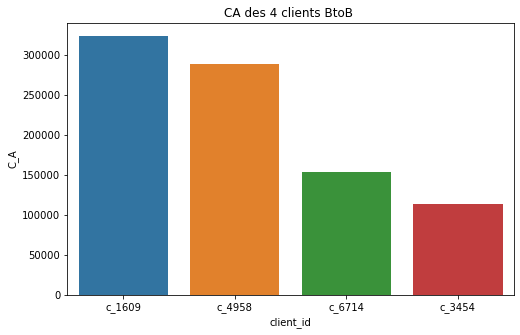

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=ca_4_categ,
    y='C_A', x='client_id')
plt.xticks(rotation=0)
plt.title('CA des 4 clients BtoB ')
plt.show()

In [61]:
#Dataframe sans les 4 gros clients btob
jointure_final = lapage.drop(cli_btb.index).reset_index(drop=True)
jointure_final

,id_prod,date,session_id,client_id,sex,birth,C_A,categ,annee,mois,jour,annee_mois,age_client
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0.0,2022,5,20,2022-05-01,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,15.99,1.0,2022,2,2,2022-02-01,34
2,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,69.99,2.0,2021,6,24,2021-06-01,21
3,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,4.99,0.0,2023,1,11,2023-01-01,43
4,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,8.57,0.0,2022,10,20,2022-10-01,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632684,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,12.99,0.0,2022,1,15,2022-01-01,71
632685,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,10.99,1.0,2022,3,19,2022-03-01,45
632686,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,12.99,0.0,2022,12,20,2022-12-01,34
632687,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,4.98,0.0,2021,7,16,2021-07-01,35


In [62]:
# les clients fidèles sans les outliers:
clients_fideles1 = jointure_final.groupby(["client_id"])["C_A"].sum().nlargest(10).reset_index()
clients_fideles1

,client_id,C_A
0,c_3263,5276.870000
1,c_1570,5271.620000
2,c_2899,5214.050000
3,c_2140,5208.820000
4,c_7319,5155.770000
5,c_8026,5093.218188
6,c_7959,5085.450000
7,c_7421,5050.200000
8,c_5263,5006.850000
9,c_1422,4993.550000


Text(0.5, 1.0, 'les clients les plus fidèles')

<Figure size 720x360 with 0 Axes>

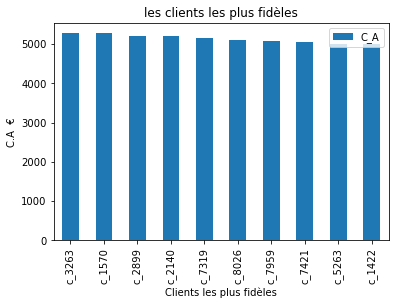

In [63]:
#Visualisation des clients fidèles sans les outliers:

plt.figure(figsize = (10,5))
clients_fideles1.plot.bar(x='client_id', y='C_A')
plt.xlabel('Clients les plus fidèles')
plt.ylabel('C.A  €')

plt.title('les clients les plus fidèles')

In [64]:
# Montant moyens des clients sans les outliers:
montant_moy = jointure_final.groupby(["client_id"])["C_A"].sum().mean()
montant_moy

1276.7512140375838

### 3.6.  Répartition du chiffre d'affaires entre clients sans outliers (courbe de Lorenz)



In [65]:
ca_client = jointure_final.groupby(['client_id'])["C_A"].sum().reset_index()
ca_client.sort_values(by='C_A')

,client_id,C_A
8147,c_8351,6.31
7914,c_8140,8.30
7885,c_8114,9.98
1555,c_240,11.06
4042,c_4648,11.20
...,...,...
7002,c_7319,5155.77
1267,c_2140,5208.82
2107,c_2899,5214.05
634,c_1570,5271.62


In [66]:
# Courbe de Lorenz
dep = ca_client["C_A"].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

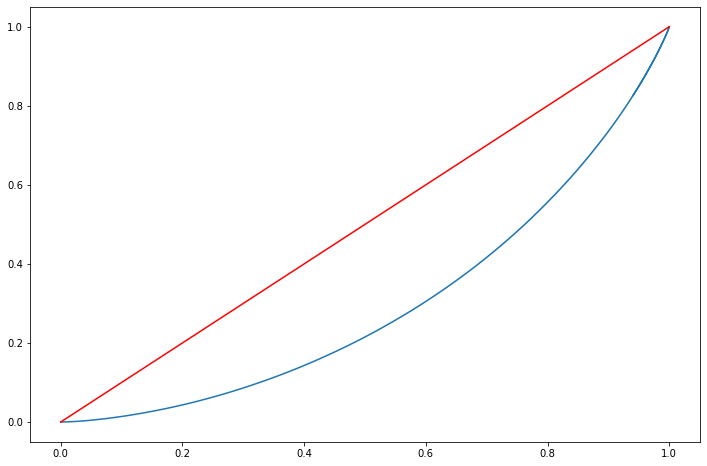

In [67]:
# Courbe de Lorenz

plt.figure (figsize= (12,8))
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")

plt.show()

In [68]:
#Indice de gini

n = len(lorenz)

AUC = (lorenz.sum()-lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S).round(3)

print(f"L'indice de Gini est égal à {gini}")

L'indice de Gini est égal à 0.403


### 3.7.  Répartition du chiffre d'affaires entre les 4 clients BtoB (courbe de Lorenz)


In [69]:
ca_clientbtob = cli_btb.groupby(['client_id'])["C_A"].sum().reset_index()
ca_clientbtob.sort_values(by='C_A')

,client_id,C_A
1,c_3454,113669.844564
3,c_6714,153662.749128
2,c_4958,289760.340000
0,c_1609,324033.350000


In [70]:
# Courbe de Lorenz
dep = cli_btb["C_A"].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

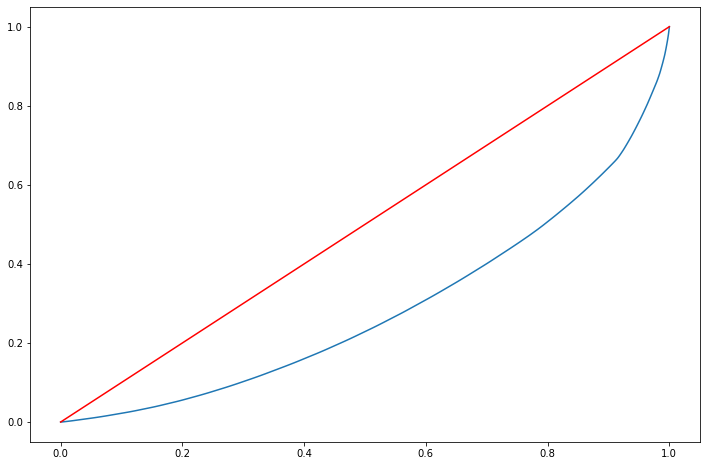

In [71]:
# Courbe de Lorenz

plt.figure (figsize= (12,8))
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")
plt.show()

In [72]:
#Indice de gini

n = len(lorenz)

AUC = (lorenz.sum()-lorenz[-1])/n 

# S est la surface entre la première bissectrice et le courbe de Lorenz

S = 0.5 - AUC 

# Définition de l'indicateur de Gini

gini = (2*S).round(3)

print(f"L'indice de Gini est égal à {gini}")

L'indice de Gini est égal à 0.426


 ## 4.  Requête de Julie

 ### 4.1.   Lien entre le genre et les catégories des livres achetés

In [73]:
from scipy.stats import chi2_contingency


In [74]:
#CA par genre et categorie
genre_categca = jointure_final.pivot_table(index='sex', columns='categ', values='C_A', aggfunc='count')
genre_categca

categ,0.0,1.0,2.0
sex,,,
f,200904,111331,16980
m,186589,101017,15868


In [75]:
chi2_contingency(genre_categca)

(20.200173796862927,
 4.1075985631484716e-05,
 2,
 array([[201629.09106212, 110493.69725094,  17092.21168694],
        [185863.90893788, 101854.30274906,  15755.78831306]]))

La valeur absolue du Chi2 calculé (20.20) est supérieure par rapport à la valeur du chi2 du tableau de contingence et notre p-value est inférieur à 5 %.

L'hypothèse nulle est rejetée, il y a une forte corrélation entre le genre et la categorie des achats.

In [76]:
genre_categca = genre_categca.reset_index()

Text(0.5, 1.0, 'Catégorie et genre des clients')

<Figure size 576x360 with 0 Axes>

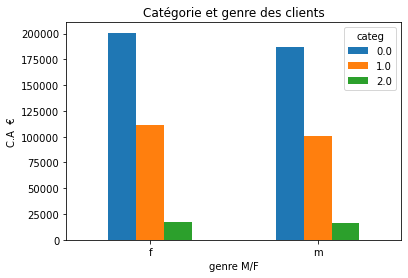

In [77]:
#Catégories des livres achetés et genre des clients

plt.figure(figsize = (8,5))
genre_categca.plot.bar(x='sex')
plt.xlabel('genre M/F')
plt.ylabel('C.A  €')
plt.xticks(rotation=0)

plt.title('Catégorie et genre des clients')

### 4.3.  Lien entre l’âge des clients et le montant total des achats

Text(0.5, 1.0, 'Montant des achats par âges')

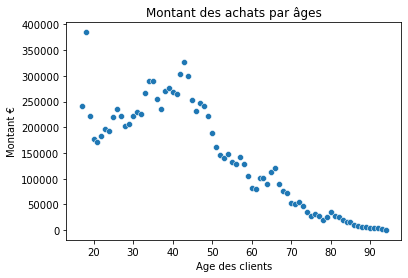

In [78]:
#Montant des achats par âge
achats_age = jointure_final.groupby(['age_client'])['C_A'].sum()

sns.scatterplot(data= achats_age)
plt.ylabel('Montant €')
plt.xlabel('Age des clients')
plt.title('Montant des achats par âges')

In [79]:
achats_age = achats_age.reset_index()

In [80]:
#Coefficient de corrélation linéaire de Pearson
coef_achats_age = sp.stats.pearsonr(achats_age['age_client'], achats_age['C_A'])
coef_achats_age

(-0.8862927840259383, 4.018933406690121e-27)

### 4.4.  Fréquence d’achat

Text(0.5, 1.0, 'Fréquence d’achat par âges')

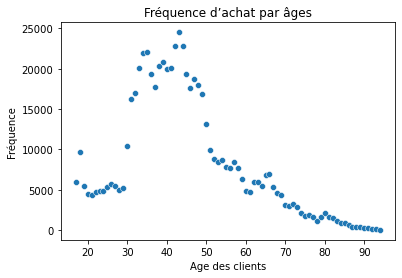

In [81]:
#Fréquence des achats par âge
nb_achats = jointure_final.groupby(['age_client'])['session_id'].count()
sns.scatterplot(data= nb_achats)
plt.ylabel('Fréquence ')
plt.xlabel('Age des clients')
plt.title('Fréquence d’achat par âges')

In [82]:
nb_achats = nb_achats.reset_index()

In [83]:
#Coefficient de corrélation linéaire de Pearson

coef_nb_achats = sp.stats.pearsonr(nb_achats['age_client'], nb_achats['session_id'])
coef_nb_achats

(-0.5774108789114261, 3.125415712178077e-08)

 ### 4.5. Taille du panier moyen et les catégories des livres achetés

In [84]:
#Taille du panier moyen et les catégories des livres achetés

taille_panier = jointure_final.groupby(['age_client','session_id'])["C_A"].count().reset_index()

panier_moyen = taille_panier.groupby(['age_client'])["C_A"].mean().reset_index()
panier_moyen

,age_client,C_A
0,17,1.743025
1,18,1.758073
2,19,1.735322
3,20,1.761526
4,21,1.768378
...,...,...
73,90,1.500000
74,91,1.794872
75,92,1.390071
76,93,1.500000


In [85]:
#Tranche age
bin_labels=labels=['0 à 31', '32 à 50 ans', '51 à 94 ans']
panier_moyen["age_client"], bin_values = pd.cut(panier_moyen.age_client, bins=[0,31,50,94], labels=bin_labels,retbins=True)


In [86]:
panier_moyen

,age_client,C_A
0,0 à 31,1.743025
1,0 à 31,1.758073
2,0 à 31,1.735322
3,0 à 31,1.761526
4,0 à 31,1.768378
...,...,...
73,51 à 94 ans,1.500000
74,51 à 94 ans,1.794872
75,51 à 94 ans,1.390071
76,51 à 94 ans,1.500000


In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import pingouin as pg


In [88]:
#Anova
pg.anova(dv='C_A', between='age_client', data=panier_moyen,
               detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,age_client,10.747102,2,5.373551,204.055517,4.602952e-31,0.844756
1,Within,1.975033,75,0.026334,NaN,NaN,NaN


 ### 4.6.  Age et categorie


In [89]:
#Age et categorie
age_categ = jointure_final.groupby(['categ'])['age_client'].mean().reset_index()
age_categ



,categ,age_client
0,0.0,43.446808
1,1.0,47.504997
2,2.0,25.652764


In [90]:
#Test d'Anova
#Age et categorie

model = smf.ols('age_client ~ categ', data=age_categ).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,158.313998,1.0,1.414887,0.44504
Residual,111.891650,1.0,NaN,NaN
